# Project of Loan Data from LandingClub.com

Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will create a machine learning model that will help you to analyze whether you will get your money back or not.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full.

In [6]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Get Data 
loans = pd.read_csv('/Users/tewodros/Downloads/LendingClub-Master/loan_data.csv')

# Check the data information
loans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
# Summaries Statistic  data
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# 1. Exploratory Data Analysis

A- Create a histogram of two FICO distribution on top each other credit.policy outcome(0,1)

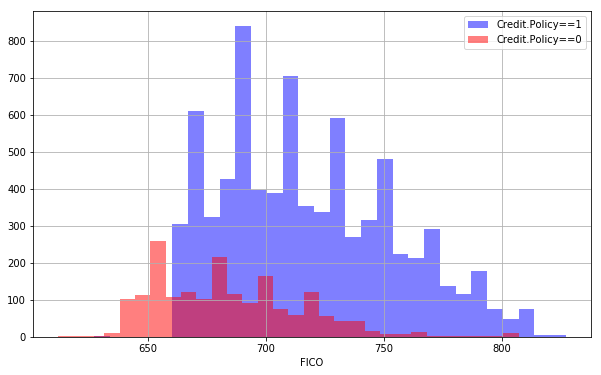

In [8]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
        bins=30,label ='Credit.Policy==1' )
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
        bins=30,label ='Credit.Policy==0')
plt.legend()
plt.xlabel("FICO")
plt.show()

B- Create a histogram of two distribution on top each other for non.full.paid column

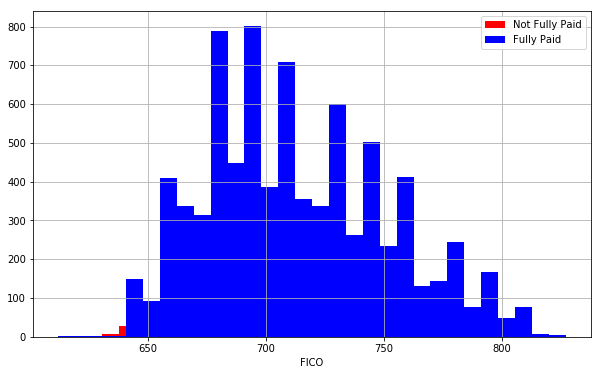

In [9]:
plt.figure(figsize =(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=1,color='red',
            bins=30,label='Not Fully Paid')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=1,color='blue',
            bins=30,label='Fully Paid')
plt.legend()
plt.xlabel("FICO")
plt.show()

C- Create a countplot using seaborn showing the counts of loans purpose 
with color hue defined not fully paid

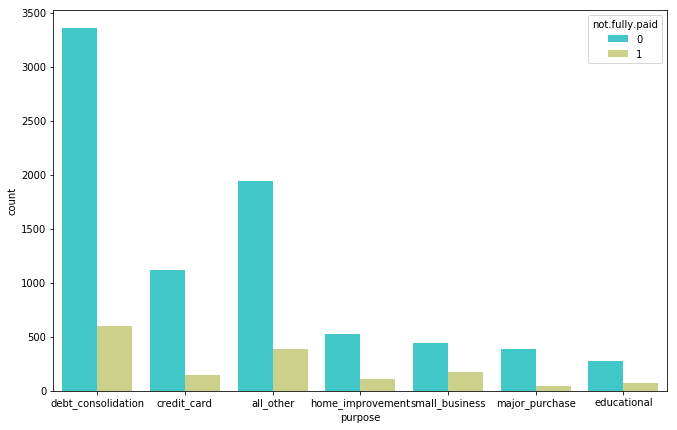

In [10]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',
              data=loans,palette='rainbow')
plt.show()


D-Create the trend beween FICO score and interest rate to check the co-relation between two

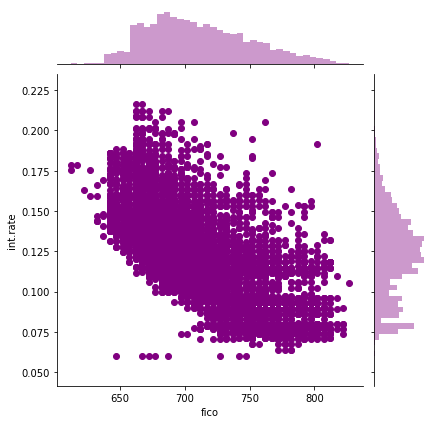

In [11]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple')
plt.show()

D- Create the implot to see if the trend differs between not.fully.paid and credit policy

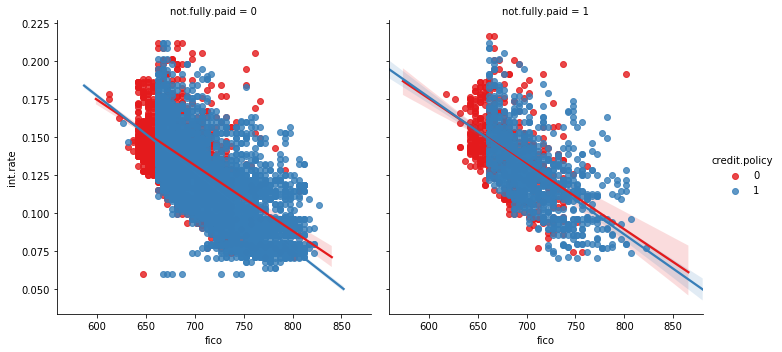

In [13]:
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',
           col='not.fully.paid',palette='Set1')
plt.show()

# 2. Data Preparation

In [15]:
cat_feats =['purpose']

final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

# Check first five recodes
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


# 3.Train/Test split

In [19]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Assign input and output variables
X= final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']

# Split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,
        random_state=101)
print(X_train.count())

credit.policy                 6704
int.rate                      6704
installment                   6704
log.annual.inc                6704
dti                           6704
fico                          6704
days.with.cr.line             6704
revol.bal                     6704
revol.util                    6704
inq.last.6mths                6704
delinq.2yrs                   6704
pub.rec                       6704
purpose_credit_card           6704
purpose_debt_consolidation    6704
purpose_educational           6704
purpose_home_improvement      6704
purpose_major_purchase        6704
purpose_small_business        6704
dtype: int64


In [21]:
#Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the classifier
dtree = DecisionTreeClassifier()

# Fit the model on training set
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# 4.Prediction and Evaluation of a Decision Tree Model

In [23]:
# Use predict method on test data
predictions = dtree.predict(X_test)

# Import classification report and confusion matrix
from sklearn.metrics import classification_report

#Print the result for classifcation report 
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.20      0.24      0.22       443

   micro avg       0.73      0.73      0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.76      0.73      0.74      2874



# 5. Random Forest Model

In [24]:
#Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the classifier
rfc = RandomForestClassifier(n_estimators=800)

#Fit the model on training set
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# 6. Prediction and Evaluation of an RF model

In [26]:
#Use predict method on test set
predictions = rfc.predict(X_test)

# Import classification report and confusion matrix
from sklearn.metrics import classification_report

# Print the result for classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.56      0.02      0.04       443

   micro avg       0.85      0.85      0.85      2874
   macro avg       0.71      0.51      0.48      2874
weighted avg       0.80      0.85      0.78      2874



# 7. Conclusion:
By seeing the result, We can say that RF performed better than the 
decision tree in this case 